## Flight Delay exploratory analysis

In [1]:
# Import libraries and load datasets from january 2019 and january 2020
# data source: https://www.kaggle.com/divyansh22/flight-delay-prediction
# US flight delay for the month of january 2019 and 2020

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

j19_df = pd.read_csv('Jan_2019_ontime.csv')
f19_df = pd.read_csv('Feb_2019_ontime.csv')

j20_df = pd.read_csv('Jan_2020_ontime.csv')
f20_df = pd.read_csv('Feb_2020_ontime.csv')

In [2]:
j19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
DAY_OF_MONTH             583985 non-null int64
DAY_OF_WEEK              583985 non-null int64
OP_UNIQUE_CARRIER        583985 non-null object
OP_CARRIER_AIRLINE_ID    583985 non-null int64
OP_CARRIER               583985 non-null object
TAIL_NUM                 581442 non-null object
OP_CARRIER_FL_NUM        583985 non-null int64
ORIGIN_AIRPORT_ID        583985 non-null int64
ORIGIN_AIRPORT_SEQ_ID    583985 non-null int64
ORIGIN                   583985 non-null object
DEST_AIRPORT_ID          583985 non-null int64
DEST_AIRPORT_SEQ_ID      583985 non-null int64
DEST                     583985 non-null object
DEP_TIME                 567633 non-null float64
DEP_DEL15                567630 non-null float64
DEP_TIME_BLK             583985 non-null object
ARR_TIME                 566924 non-null float64
ARR_DEL15                565963 non-null float64
CANCELLED                5839

In [3]:
#Parsing Dates
j20_df['Date'] = pd.to_datetime('2020-01-' + j20_df['DAY_OF_MONTH'].apply(str))
j20_df['day_name']=j20_df['Date'].dt.weekday_name
j20_df.tail()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,Date,day_name
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,11433,1143302,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN,2020-01-31,Friday
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,12478,1247805,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN,2020-01-31,Friday
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,12953,1295304,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN,2020-01-31,Friday
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,15919,1591904,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN,2020-01-31,Friday
607345,31,5,9E,20363,9E,N228PQ,4815,15919,1591904,XNA,10397,1039707,ATL,1841.0,0.0,1800-1859,2128.0,0.0,0.0,0.0,589.0,NaN,2020-01-31,Friday


In [4]:
j19_df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


### Overview

In [5]:
# Percentage of cancelled flights in 2019

'{0:.2%}'.format(j19_df['CANCELLED'].sum()/j19_df['CANCELLED'].count())


'2.86%'

In [6]:
# Percentage of flight departures that were delayed at least 15 minutes

'{0:.2%}'.format(j19_df['DEP_DEL15'].sum()/j19_df['DEP_DEL15'].count())

'17.43%'

In [7]:
# Percentage of flight arrivals that were delayed at least 15 minutes

'{0:.2%}'.format(j19_df['ARR_DEL15'].sum()/j19_df['ARR_DEL15'].count())

'18.59%'

In [8]:
# Percentage of flights that were diverted

'{0:.2%}'.format(j19_df['DIVERTED'].sum()/j19_df['DIVERTED'].count())

'0.22%'

In [9]:
# Number of airlines operating in the US on January 2019

j19_df[['OP_CARRIER']].nunique()

OP_CARRIER    17
dtype: int64

### Airlines by popularity

In [10]:
# Number of flights by airline

f_num = j19_df.groupby('OP_CARRIER')[['DEST']].count()
f_num = f_num.sort_values('DEST',ascending=False)
f_num.reset_index(level=0, inplace=True)

f_num_fev = f19_df.groupby('OP_CARRIER')[['DEST']].count()
f_num_fev = f_num_fev.sort_values('DEST',ascending=False)
f_num_fev.reset_index(level=0, inplace=True)

f_num20 = j20_df.groupby('OP_CARRIER')[['DEST']].count()
f_num20 = f_num20.sort_values('DEST',ascending=False)
f_num20.reset_index(level=0, inplace=True)

f_num_fev_20 = f20_df.groupby('OP_CARRIER')[['DEST']].count()
f_num_fev_20 = f_num_fev_20.sort_values('DEST',ascending=False)
f_num_fev_20.reset_index(level=0, inplace=True)

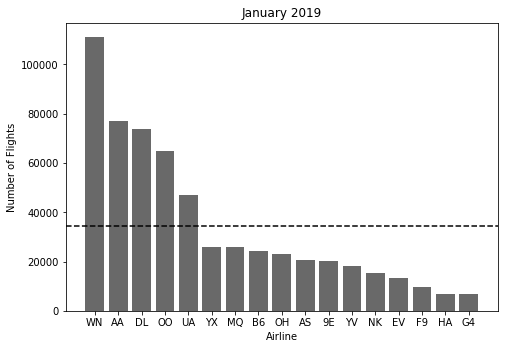

In [11]:
# Plot number of flights by airline in january 2019
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_num['OP_CARRIER']
y = f_num['DEST']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('January 2019')
ax.set_ylabel('Number of Flights')
ax.set_xlabel('Airline')
plt.show()

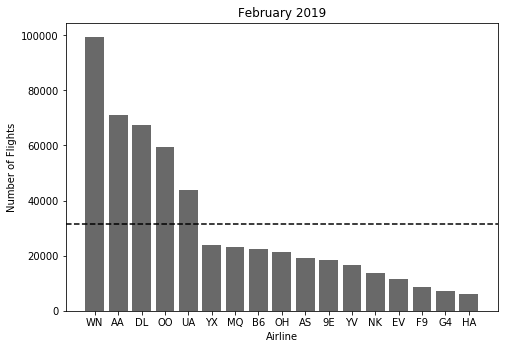

In [12]:
# Plot number of flights by airline in February 2019
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_num_fev['OP_CARRIER']
y = f_num_fev['DEST']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('February 2019')
ax.set_ylabel('Number of Flights')
ax.set_xlabel('Airline')
plt.show()

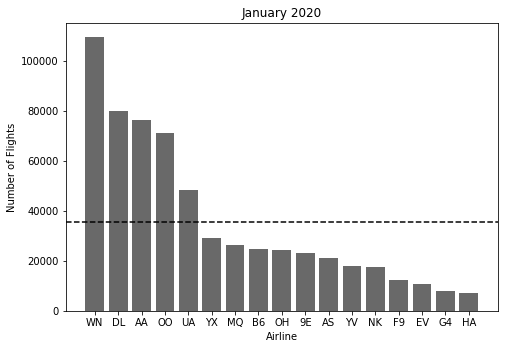

In [13]:
# Plot number of flights by airline in january 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_num20['OP_CARRIER']
y = f_num20['DEST']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('January 2020')
ax.set_ylabel('Number of Flights')
ax.set_xlabel('Airline')
plt.show()

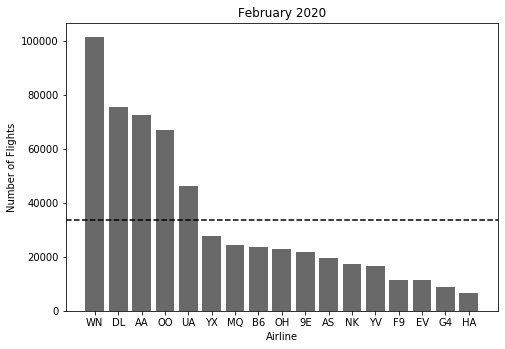

In [14]:
# Plot number of flights by airline in February 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_num_fev_20['OP_CARRIER']
y = f_num_fev_20['DEST']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('February 2020')
ax.set_ylabel('Number of Flights')
ax.set_xlabel('Airline')
plt.show()

**Number of delayed flights at departure and arrival**

In [15]:
# Number of total delayed departure flights

j19_df['DEP_DEL15'].value_counts()


0.0    468703
1.0     98927
Name: DEP_DEL15, dtype: int64

In [16]:
# Number of total delayed arrival flights

j19_df['ARR_DEL15'].value_counts()


0.0    460741
1.0    105222
Name: ARR_DEL15, dtype: int64

### Airlines by delay

In [17]:
# Number of delayed flights by airline

f_del = j19_df.groupby('OP_CARRIER')[['DEP_DEL15']].sum()
f_del = f_del.sort_values('DEP_DEL15',ascending=False)
f_del.reset_index(level=0, inplace=True)

f_del_fev = f19_df.groupby('OP_CARRIER')[['DEP_DEL15']].sum()
f_del_fev = f_del_fev.sort_values('DEP_DEL15',ascending=False)
f_del_fev.reset_index(level=0, inplace=True)

f_del20 = j20_df.groupby('OP_CARRIER')[['DEP_DEL15']].sum()
f_del20 = f_del20.sort_values('DEP_DEL15',ascending=False)
f_del20.reset_index(level=0, inplace=True)

f_del_fev_20 = f20_df.groupby('OP_CARRIER')[['DEP_DEL15']].sum()
f_del_fev_20 = f_del_fev_20.sort_values('DEP_DEL15',ascending=False)
f_del_fev_20.reset_index(level=0, inplace=True)

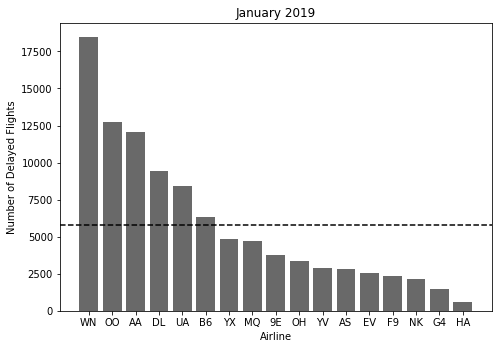

In [18]:
# Plot number of delayed flights by airline in january 2019
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del['OP_CARRIER']
y = f_del['DEP_DEL15']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('January 2019')
ax.set_ylabel('Number of Delayed Flights')
ax.set_xlabel('Airline')
plt.show()

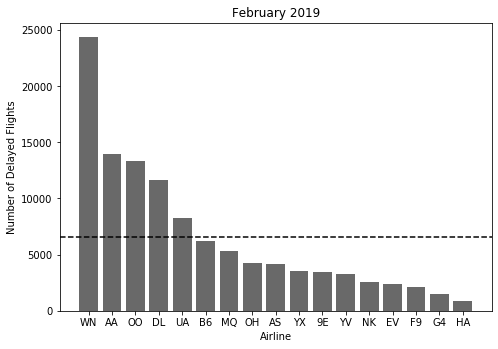

In [19]:
# Plot number of delayed flights by airline in February 2019
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del_fev['OP_CARRIER']
y = f_del_fev['DEP_DEL15']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('February 2019')
ax.set_ylabel('Number of Delayed Flights')
ax.set_xlabel('Airline')
plt.show()

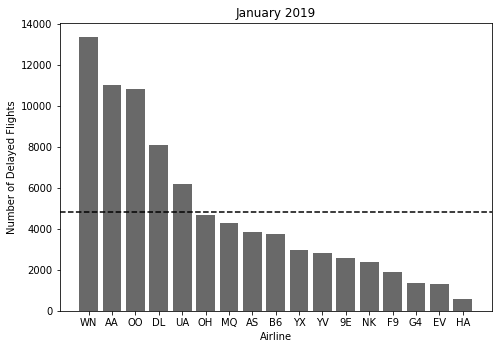

In [20]:
# Plot number of delayed flights by airline in january 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del20['OP_CARRIER']
y = f_del20['DEP_DEL15']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('January 2019')
ax.set_ylabel('Number of Delayed Flights')
ax.set_xlabel('Airline')
plt.show()

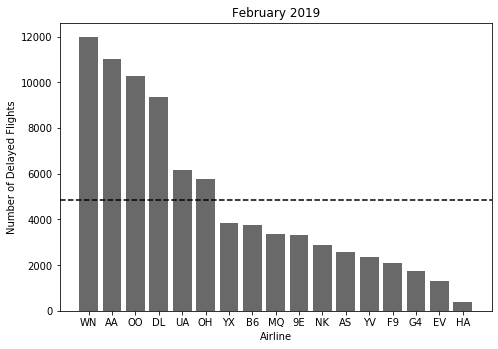

In [21]:
# Plot number of delayed flights by airline in February 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del_fev_20['OP_CARRIER']
y = f_del_fev_20['DEP_DEL15']
avg = y.mean()
ax.bar(x,y, color='dimgrey')
ax.axhline(y= avg, label = 'Average', color='black',linestyle='--')
ax.set_title('February 2019')
ax.set_ylabel('Number of Delayed Flights')
ax.set_xlabel('Airline')
plt.show()

**Calculate percentage of delayed, cancelled or diverted flights by airline**

In [22]:
# Number of cancelled flights by airline

f_cancel = j19_df.groupby('OP_CARRIER')[['CANCELLED']].sum()
f_cancel.reset_index(level=0, inplace=True)

f_cancel_fev = f19_df.groupby('OP_CARRIER')[['CANCELLED']].sum()
f_cancel_fev.reset_index(level=0, inplace=True)

f_cancel20 = j20_df.groupby('OP_CARRIER')[['CANCELLED']].sum()
f_cancel20.reset_index(level=0, inplace=True)

f_cancel_fev_20 = f20_df.groupby('OP_CARRIER')[['CANCELLED']].sum()
f_cancel_fev_20.reset_index(level=0, inplace=True)

In [23]:
# Number of diverted flights by airline

f_div = j19_df.groupby('OP_CARRIER')[['DIVERTED']].sum()
f_div.reset_index(level=0, inplace=True)

f_div_fev = f19_df.groupby('OP_CARRIER')[['DIVERTED']].sum()
f_div_fev.reset_index(level=0, inplace=True)

f_div20 = j20_df.groupby('OP_CARRIER')[['DIVERTED']].sum()
f_div20.reset_index(level=0, inplace=True)

f_div_fev_20 = f20_df.groupby('OP_CARRIER')[['DIVERTED']].sum()
f_div_fev_20.reset_index(level=0, inplace=True)

**we can notice that delays at arrival are greater than at departure!**

In [24]:
# percentage of delayed, cancelled or diverted flights

f_del_perc = f_del['DEP_DEL15']/ f_num['DEST']
f_cancel_perc = f_cancel['CANCELLED']/f_num['DEST']
f_div_perc = f_div['DIVERTED']/f_num['DEST']

f_del_perc_fev = f_del_fev['DEP_DEL15']/ f_num_fev['DEST']
f_cancel_perc_fev = f_cancel_fev['CANCELLED']/f_num_fev['DEST']
f_div_perc_fev = f_div_fev['DIVERTED']/f_num_fev['DEST']

f_del_perc20 = f_del20['DEP_DEL15']/ f_num20['DEST']
f_cancel_perc20 = f_cancel20['CANCELLED']/f_num20['DEST']
f_div_perc20 = f_div20['DIVERTED']/f_num20['DEST']

f_del_perc_fev_20 = f_del_fev_20['DEP_DEL15']/ f_num_fev_20['DEST']
f_cancel_perc_fev_20 = f_cancel_fev_20['CANCELLED']/f_num_fev_20['DEST']
f_div_perc_fev_20 = f_div_fev_20['DIVERTED']/f_num_fev_20['DEST']

### Airlines by delay/cancel/diverted

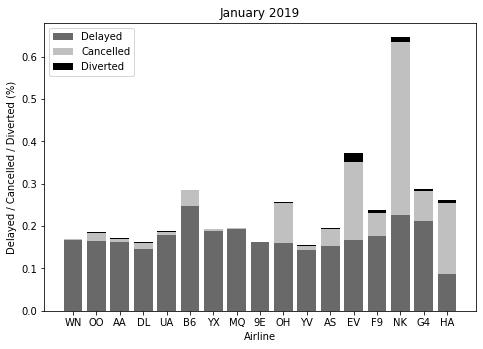

In [25]:
# Plot number of delayed flights by airline in january 2019
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del['OP_CARRIER']
y = f_del_perc
z = f_cancel_perc
w = f_div_perc
ax.bar(x,y, color='dimgrey')
ax.bar(x,z,bottom=y ,color='silver')
ax.bar(x,w,bottom=(z+y) ,color='black')
ax.set_title('January 2019')
ax.set_ylabel('Delayed / Cancelled / Diverted (%)')
ax.set_xlabel('Airline')
ax.legend(labels=['Delayed', 'Cancelled','Diverted'])
plt.show()

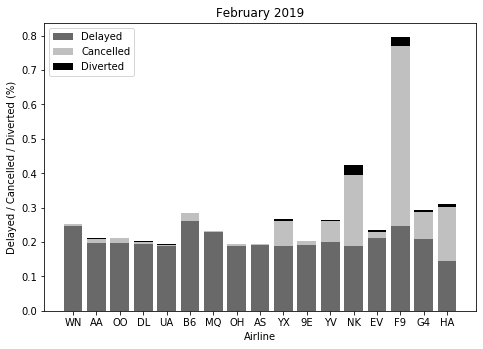

In [26]:
# Plot number of delayed flights by airline in February 2019
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del_fev['OP_CARRIER']
y = f_del_perc_fev
z = f_cancel_perc_fev
w = f_div_perc_fev
ax.bar(x,y, color='dimgrey')
ax.bar(x,z,bottom=y ,color='silver')
ax.bar(x,w,bottom=(z+y) ,color='black')
ax.set_title('February 2019')
ax.set_ylabel('Delayed / Cancelled / Diverted (%)')
ax.set_xlabel('Airline')
ax.legend(labels=['Delayed', 'Cancelled','Diverted'])
plt.show()

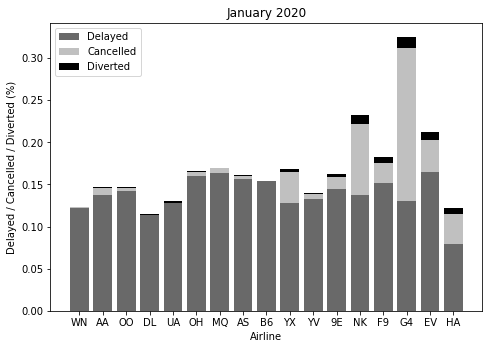

In [27]:
# Plot number of delayed flights by airline in january 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del20['OP_CARRIER']
y = f_del_perc20
z = f_cancel_perc20
w = f_div_perc20
ax.bar(x,y, color='dimgrey')
ax.bar(x,z,bottom=y ,color='silver')
ax.bar(x,w,bottom=(z+y) ,color='black')
ax.set_title('January 2020')
ax.set_ylabel('Delayed / Cancelled / Diverted (%)')
ax.set_xlabel('Airline')
ax.legend(labels=['Delayed', 'Cancelled','Diverted'])
plt.show()

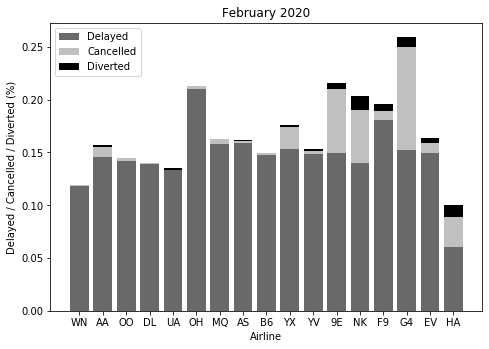

In [28]:
# Plot number of delayed flights by airline in February 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = f_del20['OP_CARRIER']
y = f_del_perc_fev_20
z = f_cancel_perc_fev_20
w = f_div_perc_fev_20
ax.bar(x,y, color='dimgrey')
ax.bar(x,z,bottom=y ,color='silver')
ax.bar(x,w,bottom=(z+y) ,color='black')
ax.set_title('February 2020')
ax.set_ylabel('Delayed / Cancelled / Diverted (%)')
ax.set_xlabel('Airline')
ax.legend(labels=['Delayed', 'Cancelled','Diverted'])
plt.show()

In [29]:
# Number of delays by origin airport

f_del_orig = j19_df.groupby('ORIGIN')[['DEP_DEL15']].sum()
f_del_orig.sort_values(by=['ORIGIN'])
f_del_orig.reset_index(level=0, inplace=True)
f_del_orig

,ORIGIN,DEP_DEL15
0,ABE,49.0
1,ABI,24.0
2,ABQ,197.0
3,ABR,7.0
4,ABY,10.0
5,ACT,8.0
6,ACV,38.0
7,ACY,18.0
8,ADK,2.0
9,ADQ,9.0


In [30]:
# Number of flights by origin airport

f_num_orig = j19_df.groupby('ORIGIN')[['ORIGIN_AIRPORT_ID']].count()
f_num_orig.sort_values(by=['ORIGIN'])
f_num_orig.reset_index(level=0, inplace=True)
f_num_orig

,ORIGIN,ORIGIN_AIRPORT_ID
0,ABE,339
1,ABI,170
2,ABQ,1731
3,ABR,62
4,ABY,84
5,ACT,116
6,ACV,129
7,ACY,298
8,ADK,9
9,ADQ,53


In [31]:
# Percentage of delays by airport

f_del_orig_perc = f_del_orig['DEP_DEL15']/f_num_orig['ORIGIN_AIRPORT_ID']
f_del_orig_df = pd.concat([f_num_orig['ORIGIN'],f_del_orig_perc], axis=1, join='inner')
f_del_orig_df.sort_values(by=[0])

,ORIGIN,0
259,PPG,0.000000
323,SWO,0.016129
102,ELM,0.029412
197,LWS,0.031250
47,BRW,0.032258
126,GGG,0.033898
101,EKO,0.034483
137,GTR,0.036145
198,LYH,0.041667
166,ITO,0.050104


**we can see that 90% of flight delays in american airports are in the range between 2% and 30%**

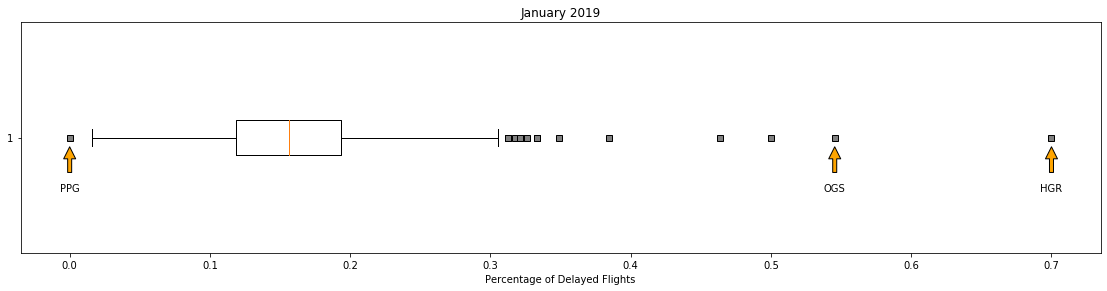

In [32]:
# Plot boxplot of percentage of delayed flights by airport of origin in january 2019
gray_sq = dict(markerfacecolor='gray',marker='s')
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,0.8])
y = f_del_orig_perc
ax.boxplot(y,vert=False, flierprops=gray_sq)
ax.set_title('January 2019')
ax.set_xlabel('Percentage of Delayed Flights')
ax.annotate('PPG', xy=(0, 1), xytext=(0,0.8 ),
            arrowprops=dict(facecolor='orange', shrink=0.2),horizontalalignment='center', verticalalignment='top')
ax.annotate('HGR', xy=(0.7, 1), xytext=(0.7,0.8 ),
            arrowprops=dict(facecolor='orange', shrink=0.2),horizontalalignment='center', verticalalignment='top')
ax.annotate('OGS', xy=(0.545455, 1), xytext=(0.545455,0.8 ),
            arrowprops=dict(facecolor='orange', shrink=0.2),horizontalalignment='center', verticalalignment='top')
plt.show()

### Number of routes and number of flights per airplane

In [33]:
# This approach consolidates the routes in january 2019

j19_df['OP_CARRIER_FL_NUM'].value_counts()

403     310
761     291
465     287
466     285
546     283
       ... 
6494      1
6714      1
6561      1
6839      1
6371      1
Name: OP_CARRIER_FL_NUM, Length: 6839, dtype: int64

In [34]:
# How many airplanes were operating in january 2019?

j19_df['TAIL_NUM'].nunique()

5446

In [35]:
# How many flights did each airplane do in january 2019?

j19_df['TAIL_NUM'].value_counts()

N488HA    361
N481HA    348
N483HA    346
N489HA    344
N493HA    328
         ... 
N639VA      1
N271AY      1
N662UA      1
N2534U      1
N167US      1
Name: TAIL_NUM, Length: 5446, dtype: int64

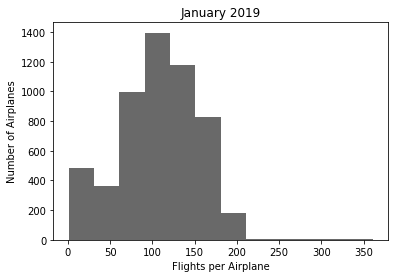

In [36]:
plt.hist(j19_df['TAIL_NUM'].value_counts(),color='dimgrey',bins=12,align='mid')
plt.title('January 2019')
plt.xlabel('Flights per Airplane')
plt.ylabel('Number of Airplanes')
plt.show()

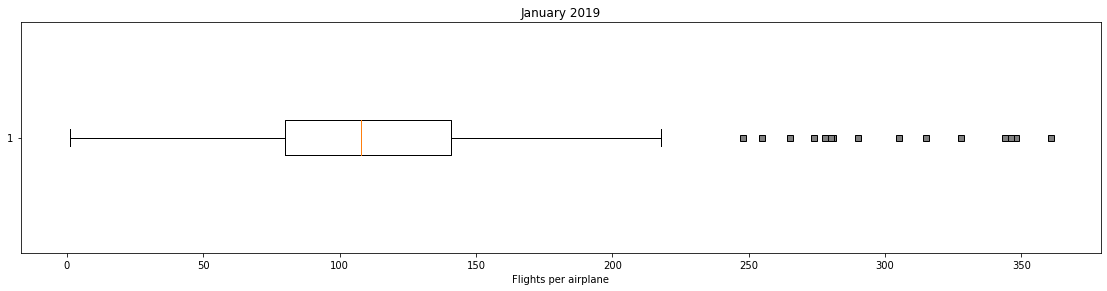

In [37]:
# Plot boxplot of percentage of delayed flights by airport of origin in january 2019
gray_sq = dict(markerfacecolor='gray',marker='s')
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,0.8])
y = j19_df['TAIL_NUM'].value_counts()
ax.boxplot(y,vert=False, flierprops=gray_sq)
ax.set_title('January 2019')
ax.set_xlabel('Flights per airplane')
#ax.annotate('PPG', xy=(0, 1), xytext=(0,0.8 ),
#            arrowprops=dict(facecolor='orange', shrink=0.2),horizontalalignment='center', verticalalignment='top')
#ax.annotate('HGR', xy=(0.7, 1), xytext=(0.7,0.8 ),
#            arrowprops=dict(facecolor='orange', shrink=0.2),horizontalalignment='center', verticalalignment='top')
#ax.annotate('OGS', xy=(0.545455, 1), xytext=(0.545455,0.8 ),
#            arrowprops=dict(facecolor='orange', shrink=0.2),horizontalalignment='center', verticalalignment='top')
plt.show()

### Variables heatmap

**The heatmap shows us weak correlation among variables**

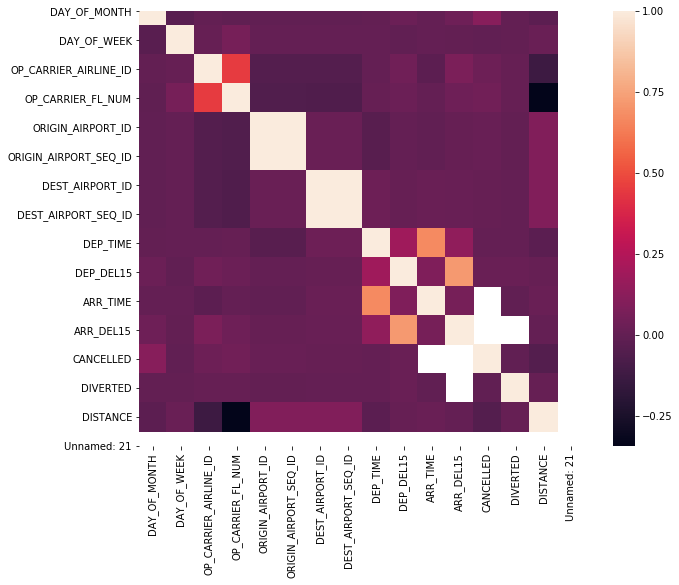

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
corr = j19_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [39]:
f_wn = j19_df[j19_df['OP_CARRIER']=='WN']

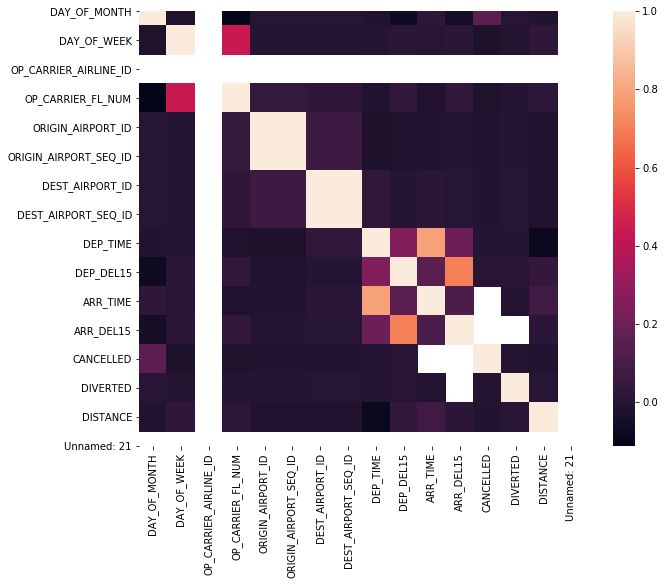

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
corr = f_wn.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);